# MODELS STATISTICS NOTEBOOK

Generates statistics and compares different models

# 1/Imports

In [1]:
# Imports
%matplotlib inline
import json
import os
import matplotlib.pyplot as plt
from AxonDeepSeg.testing.segmentation_scoring import *
import pickle
import pandas as pd
import seaborn as sns
sns.set(font_scale=1.2)

from time import time
#from ipywidgets.widgets import *
from scipy.misc import imread, imsave

# 2/Choose models to compare

In [12]:
L_models_to_compare=['baseline_classic','atrous','best-aspp']
L_CRF = ['baseline_classic','atrous_config_tests/model_1_1']
L_CRF2 = ['best-aspp']

# 3/ Computation of statistics

First, we compare the pixel-wise statistics of the different models: accuracy, pw-dice, mAP (per class, total)

In [13]:
img_name='SEM_data15'

In [4]:
pr_data={}
for model_name in L_models_to_compare:
    pr_data[model_name] = pickle.load( open( os.path.join('../models/',model_name,img_name+'_pixel_wise_statistics.pkl'), "rb" ) )

for model_name in L_CRF:
    pr_data[model_name] = pickle.load( open( os.path.join('../../../axondeepseg-atrous/axondeepseg/models/',model_name,img_name+'_pixel_wise_statistics.pkl'), "rb" ) )


In [19]:
pr_data['baseline_classic'] = pickle.load( open( '../../../axondeepseg-atrous/axondeepseg/models/baseline_classic/SEM_data15_pixel_wise_statistics.pkl', "rb" ))
pr_data['baseline_classic_crf'] = pickle.load( open( '../../../axondeepseg-atrous/axondeepseg/models/baseline_classic/SEM_data15_pixel_wise_statistics_crf.pkl', "rb" ))

In [20]:
pr_data['atrous'] = pickle.load( open( '../../../axondeepseg-atrous/axondeepseg/models/atrous_config_tests/model_1_1/SEM_data15_pixel_wise_statistics.pkl', "rb" ))
pr_data['atrous_crf'] = pickle.load( open( '../../../axondeepseg-atrous/axondeepseg/models/atrous_config_tests/model_1_1/SEM_data15_pixel_wise_statistics_crf.pkl', "rb" ))

In [21]:
pr_data['aspp'] = pickle.load( open( '../models/best-aspp/SEM_data15_pixel_wise_statistics.pkl', "rb" ))
pr_data['aspp_crf'] = pickle.load( open( '../models/best-aspp/SEM_data15_pixel_wise_statistics_crf.pkl', "rb" ))

Affichage du tableau comparatif

In [24]:
L_names=['baseline_classic','baseline_classic_crf','atrous','atrous_crf','aspp','aspp_crf']

In [32]:
pw_stats=pd.DataFrame()
for model_name in L_names:
    # Accuracy
    pw_stats.loc['Acc',str(model_name)]=pr_data[model_name]['total_acc']
    
    # Dice
    pw_stats.loc['mDice',str(model_name)]=pr_data[model_name]["dice"]['micro']
    pw_stats.loc['Dice_BG',str(model_name)]=pr_data[model_name]["dice"]['bg']
    pw_stats.loc['Dice_MY',str(model_name)]=pr_data[model_name]["dice"]['myelin']
    pw_stats.loc['Dice_AX',str(model_name)]=pr_data[model_name]["dice"]['axon']
    
    # AP-related metrics
    pw_stats.loc['mAP',str(model_name)]=pr_data[model_name]["mAP"]["micro"]
    pw_stats.loc['AP_BG',str(model_name)]=pr_data[model_name]["mAP"][0]
    pw_stats.loc['AP_MY',str(model_name)]=pr_data[model_name]["mAP"][1]
    pw_stats.loc['AP_AX',str(model_name)]=pr_data[model_name]["mAP"][2]
pw_stats = pw_stats.round(3)

In [33]:
pw_stats

,baseline_classic,baseline_classic_crf,atrous,atrous_crf,aspp,aspp_crf
Acc,0.852,0.855,0.854,0.860,0.832,0.841
mDice,0.852,0.853,0.854,0.859,0.832,0.840
Dice_BG,0.831,0.826,0.838,0.837,0.807,0.806
Dice_MY,0.825,0.833,0.825,0.838,0.799,0.820
Dice_AX,0.909,0.910,0.909,0.911,0.902,0.904
mAP,0.933,0.925,0.933,0.925,0.929,0.923
AP_BG,0.919,0.912,0.919,0.914,0.901,0.897
AP_MY,0.915,0.907,0.919,0.914,0.912,0.904
AP_AX,0.978,0.967,0.973,0.958,0.976,0.969


Affichage des courbes d'AP

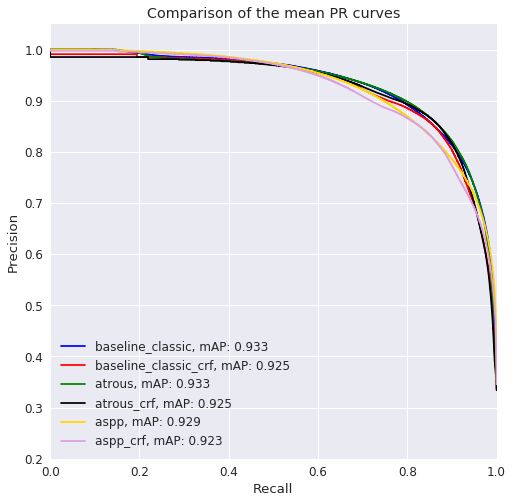

RuntimeError: libpng signaled error

In [31]:
# Display the plots
plt.figure(figsize=(8,8))
L_colors=['b','r','g','k','gold','plum','darked']
for i, model_name in enumerate(L_names):
    pr_data_model=pr_data[model_name]
    plt.step(pr_data_model['recall']['micro'], pr_data_model['precision']['micro'], color=L_colors[i], alpha=1.0,
         where='post',label=str(model_name)+', mAP: '+str(np.round(pr_data_model['mAP']['micro'],decimals=3)))
    
plt.legend(loc=0)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Comparison of the mean PR curves')
plt.ylim([0.2, 1.05])
plt.xlim([0.0, 1.0])
plt.show()
plt.savefig('destination_path.png', dpi=1000)

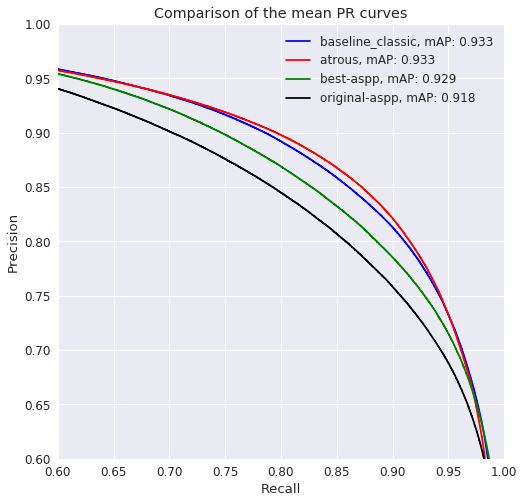

In [8]:
# Display the plots
plt.figure(figsize=(8,8))
L_colors=['b','r','g','k','gold','plum','darked']
for i, model_name in enumerate(L_models_to_compare):
    pr_data_model=pr_data[model_name]
    plt.step(pr_data_model['recall']['micro'], pr_data_model['precision']['micro'], color=L_colors[i], alpha=1,
         where='post',label=str(model_name)+', mAP: '+str(np.round(pr_data_model['mAP']['micro'],decimals=3)))
    
plt.legend(loc=0)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Comparison of the mean PR curves')
plt.ylim([0.6, 1.0])
plt.xlim([0.6, 1.0])
plt.show()